Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import statsmodels.api as sm

Loading Dataset

In [2]:
df = pd.read_excel('DataSementara.xlsx')
df.sample(5)

,No,Judul,Tanggal penyelenggaraan,jam penyelenggaraan,Pendaftar,Jumlah yang hadir,Kegiatan,Target,Reach,impression,engagement,Media,Biaya iklan,pendapatan,Tema pelatihan,Durasi Iklan,Tanggal dimulai iklan,Profit,Bulan Penyelenggaraan,Jam
1,2,Pelatihan membuat video pembelajaran modern,2022-02-09,13:00:00,653,167,Komunitas,Mahasiswa & Profesional,3085,4297,288,"Facebook, Instagram",50000,90000,Microsoft Office,5,2022-01-31,40000,2,13.0
16,17,webinar Start your careeer as programmer,2022-06-15,11:00:00,266,89,Kolaborasi,Mahasiswa & Freshgraduate,1316,1582,20,"Facebook, Instagram, linkedin",60000,60000,Persiapan karir,1,2022-06-14,0,6,11.0
14,15,Webinar Canva for Teaching,2022-05-24,13:00:00,280,112,Kolaborasi,Profesional,1659,1889,70,"Facebook, Instagram",20000,50000,Pendidikan,5,2022-05-19,30000,5,13.0
30,31,Webinar ChatGpt & Excel,2023-06-25,NaN,53,36,Komunitas,Profesional,1185,1403,54,"Facebook, Instagram, linkedin",20000,20000,ChatGPT,1,2023-06-21,0,6,NaN
33,34,Webinar Bagaimana Machine learning membantu da...,2023-08-24,13:00:00,68,28,Komunitas,"Mahasiswa, Profesional, Umum",847,996,40,"Facebook, Instagram, linkedin",25000,60000,Machine Learning,5,2023-08-18,35000,8,13.0


Check the shape of the Dataset

In [3]:
df.shape

(36, 20)

Chekcing the number of Columns in the Dataset

In [4]:
df.columns

Index(['No', 'Judul', 'Tanggal penyelenggaraan', 'jam penyelenggaraan',
       'Pendaftar', 'Jumlah yang hadir', 'Kegiatan', 'Target', 'Reach',
       'impression', 'engagement', 'Media', 'Biaya iklan', 'pendapatan',
       'Tema pelatihan', 'Durasi Iklan', 'Tanggal dimulai iklan', 'Profit',
       'Bulan Penyelenggaraan', 'Jam'],
      dtype='object')

Information about the Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   No                       36 non-null     int64         
 1   Judul                    36 non-null     object        
 2   Tanggal penyelenggaraan  36 non-null     datetime64[ns]
 3   jam penyelenggaraan      34 non-null     object        
 4   Pendaftar                36 non-null     int64         
 5   Jumlah yang hadir        36 non-null     int64         
 6   Kegiatan                 36 non-null     object        
 7   Target                   36 non-null     object        
 8   Reach                    36 non-null     int64         
 9   impression               36 non-null     int64         
 10  engagement               36 non-null     int64         
 11  Media                    36 non-null     object        
 12  Biaya iklan              36 non-null  

In [6]:
df.describe()

,No,Tanggal penyelenggaraan,Pendaftar,Jumlah yang hadir,Reach,impression,engagement,Biaya iklan,pendapatan,Durasi Iklan,Tanggal dimulai iklan,Profit,Bulan Penyelenggaraan,Jam
count,36.000000,36,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36,36.000000,36.000000,34.000000
mean,18.500000,2022-09-11 05:20:00,210.611111,106.361111,2057.138889,2533.916667,81.944444,52777.777778,116388.888889,3.444444,2022-08-27 22:40:00,63611.111111,5.444444,12.970588
min,1.000000,2022-02-09 00:00:00,22.000000,10.000000,847.000000,996.000000,20.000000,20000.000000,20000.000000,1.000000,2022-01-31 00:00:00,0.000000,2.000000,8.000000
25%,9.750000,2022-03-18 18:00:00,94.250000,43.750000,1268.500000,1486.250000,41.750000,30000.000000,60000.000000,2.000000,2022-03-15 18:00:00,28750.000000,3.000000,13.000000
50%,18.500000,2022-06-18 12:00:00,204.000000,97.500000,1451.000000,1733.500000,63.000000,45000.000000,80000.000000,2.000000,2022-06-15 00:00:00,40000.000000,5.500000,13.000000
75%,27.250000,2023-03-01 00:00:00,277.750000,136.500000,1640.250000,2000.750000,90.250000,56250.000000,110000.000000,5.000000,2022-12-26 00:00:00,50000.000000,7.250000,14.000000
max,36.000000,2023-09-29 00:00:00,653.000000,311.000000,18651.000000,24183.000000,303.000000,200000.000000,740000.000000,11.000000,2023-09-15 00:00:00,540000.000000,12.000000,19.000000
std,10.535654,NaN,140.928610,76.308454,2896.796409,3787.177972,72.119720,38460.451755,134523.556679,2.822810,NaN,99287.541379,2.922274,2.430679


Checking if there are any null values present in the dataset

In [7]:
df.isnull().sum()

No                         0
Judul                      0
Tanggal penyelenggaraan    0
jam penyelenggaraan        2
Pendaftar                  0
Jumlah yang hadir          0
Kegiatan                   0
Target                     0
Reach                      0
impression                 0
engagement                 0
Media                      0
Biaya iklan                0
pendapatan                 0
Tema pelatihan             0
Durasi Iklan               0
Tanggal dimulai iklan      0
Profit                     0
Bulan Penyelenggaraan      0
Jam                        2
dtype: int64

Checking if there are any duplicate value present in dataset

In [8]:
df.duplicated().sum()

0

In [9]:
df_heatmap = ['Pendaftar', 'Jumlah yang hadir', 'Reach', 'impression', 'engagement', 'Biaya iklan', 'pendapatan', 'Profit']

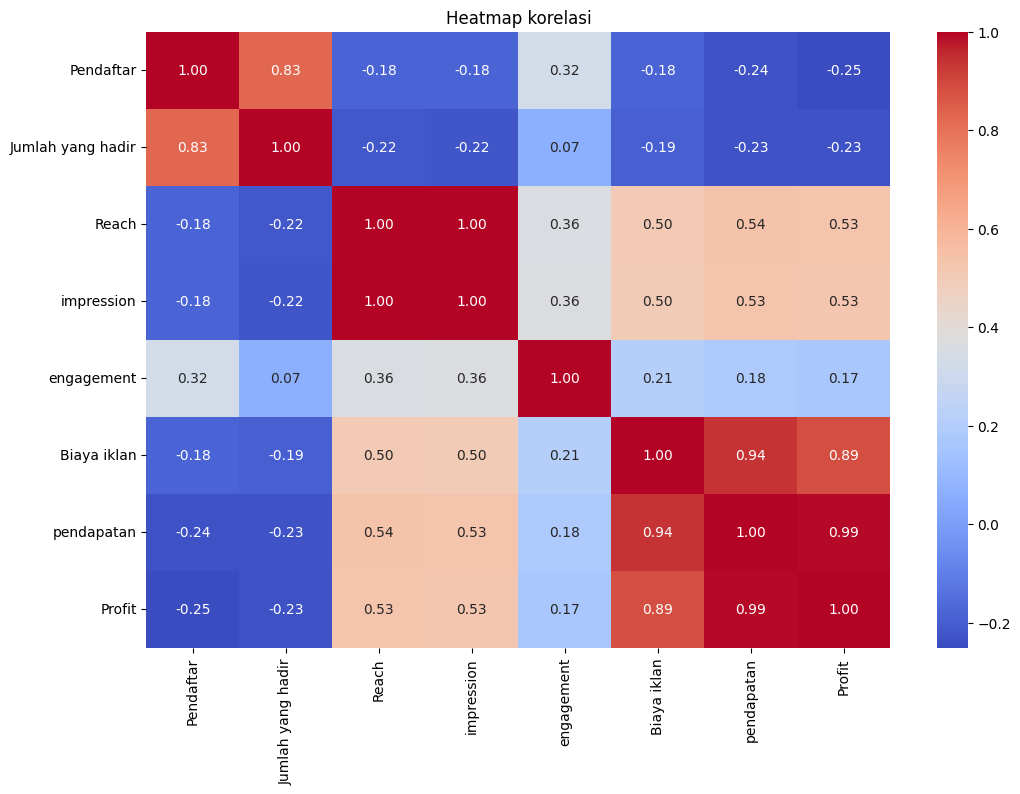

In [10]:
kor_matriks = df[df_heatmap].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(kor_matriks, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap korelasi')
plt.show()

In [11]:
total_pendaftar = df['Pendaftar'].sum()

print(f'Total pendaftar: {total_pendaftar}')

Total pendaftar: 7582


In [12]:
total_hadir = df['Jumlah yang hadir'].sum()

print(f'Total yang hadir: {total_hadir}')

Total yang hadir: 3829


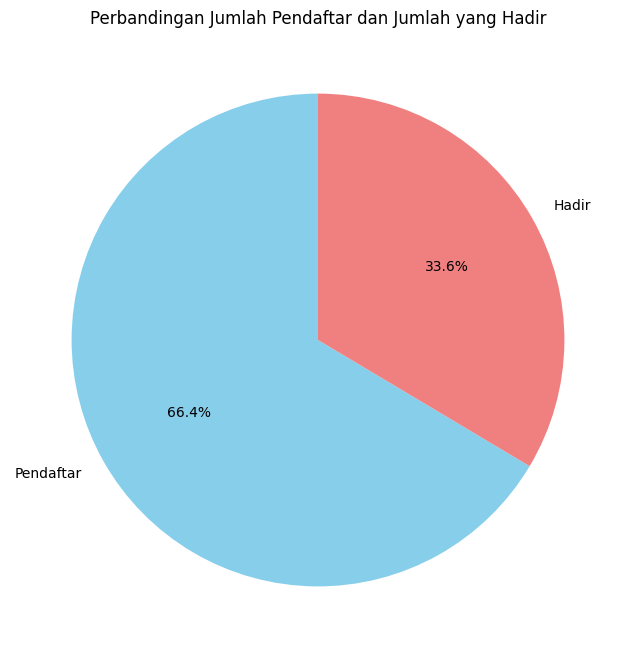

In [15]:
# Membuat visualisasi dengan pie chart
labels = ['Pendaftar', 'Hadir']
sizes = [total_pendaftar, total_hadir]
colors = ['skyblue', 'lightcoral']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Perbandingan Jumlah Pendaftar dan Jumlah yang Hadir')
plt.show()

In [16]:
total_kegiatan = df['Kegiatan'].value_counts()

print(f'Total kegiatan: {total_kegiatan}')

Total kegiatan: Kegiatan
Komunitas     22
Kolaborasi    12
Premium        2
Name: count, dtype: int64


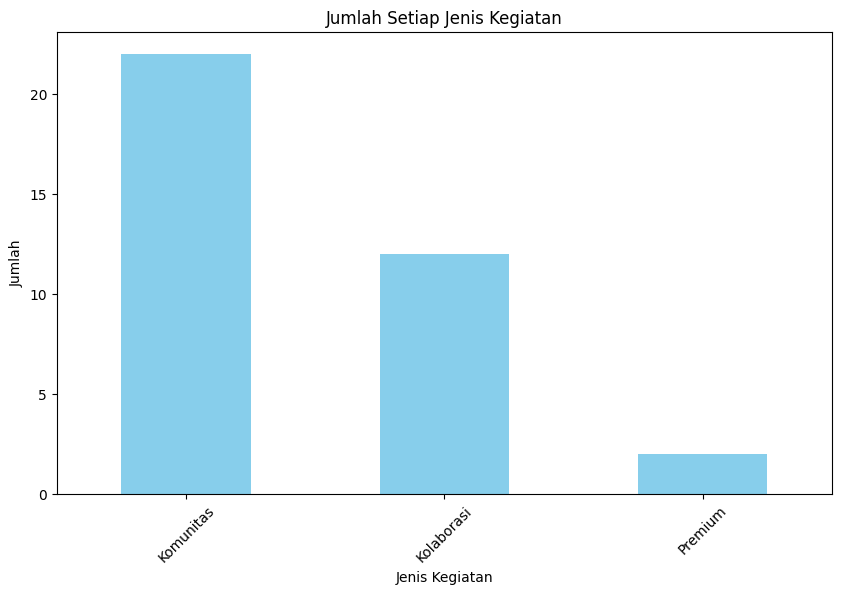

In [17]:
plt.figure(figsize=(10, 6))
total_kegiatan.plot(kind='bar', color='skyblue')
plt.title('Jumlah Setiap Jenis Kegiatan')
plt.xlabel('Jenis Kegiatan')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

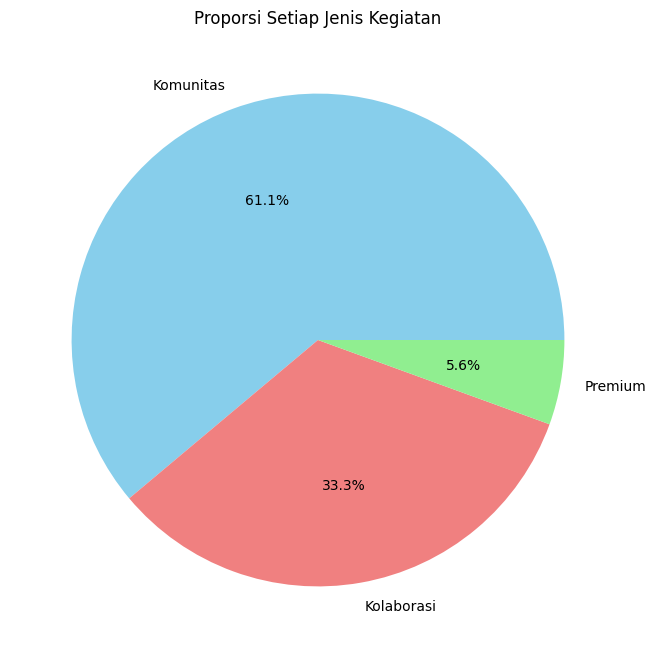

In [18]:
plt.figure(figsize=(8, 8))
plt.pie(total_kegiatan, labels=total_kegiatan.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen', 'orange'])
plt.title('Proporsi Setiap Jenis Kegiatan')
plt.show()

In [19]:
print('Total Target')
df['Target'].value_counts()

Total Target


Target
Mahasiswa & Freshgraduate       15
Profesional                      6
Mahasiswa, Profesional, Umum     6
Guru & Siswa                     3
Guru                             3
Mahasiswa & Profesional          2
Mahasiswa                        1
Name: count, dtype: int64

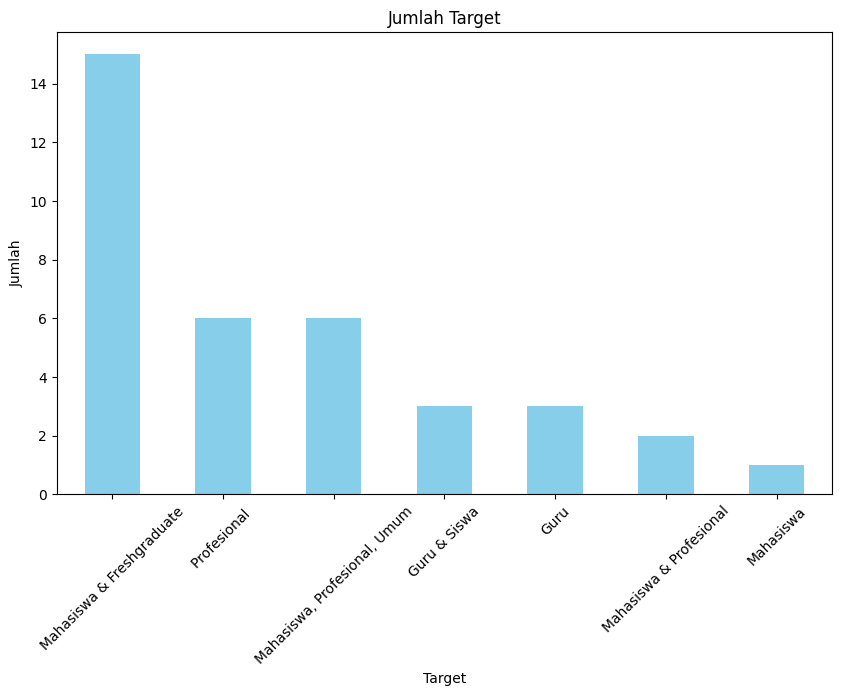

In [20]:
plt.figure(figsize=(10, 6))
df['Target'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Jumlah Target')
plt.xlabel('Target')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

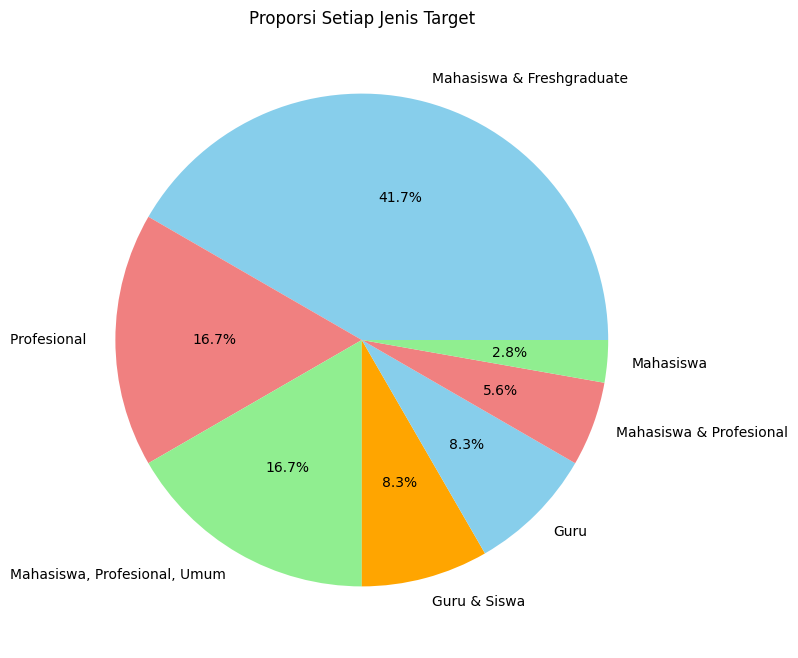

In [22]:
plt.figure(figsize=(8, 8))
plt.pie(df['Target'].value_counts(), labels=df['Target'].value_counts().index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen', 'orange'])
plt.title('Proporsi Setiap Jenis Target')
plt.show()

In [23]:
df['Media'].value_counts()

Media
Facebook, Instagram, linkedin    24
Facebook, Instagram              12
Name: count, dtype: int64

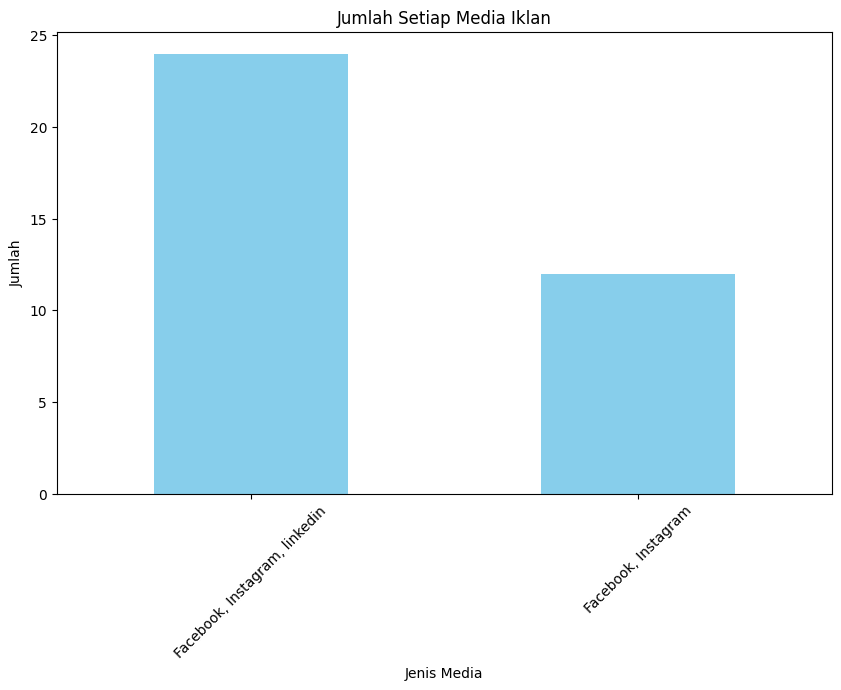

In [24]:
plt.figure(figsize=(10, 6))
df['Media'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Jumlah Setiap Media Iklan')
plt.xlabel('Jenis Media')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

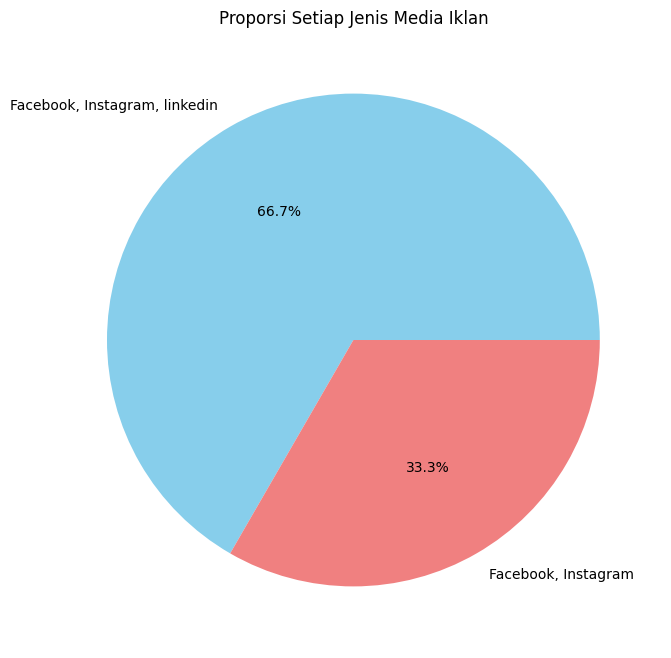

In [25]:
plt.figure(figsize=(8, 8))
plt.pie(df['Media'].value_counts(), labels=df['Media'].value_counts().index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen', 'orange'])
plt.title('Proporsi Setiap Jenis Media Iklan')
plt.show()

In [26]:
df['Tema pelatihan'].value_counts()

Tema pelatihan
Persiapan karir                  9
AI                               5
Minecraft                        5
Microsoft Office                 3
Pendidikan                       2
Microsoft 365                    2
ChatGPT                          2
Teknologi bigdata, blockchain    1
microsoft                        1
Microsoft Word                   1
Microsoft Excel                  1
Data Analyst                     1
Machine Learning                 1
Microsoft Power BI               1
User Interface                   1
Name: count, dtype: int64

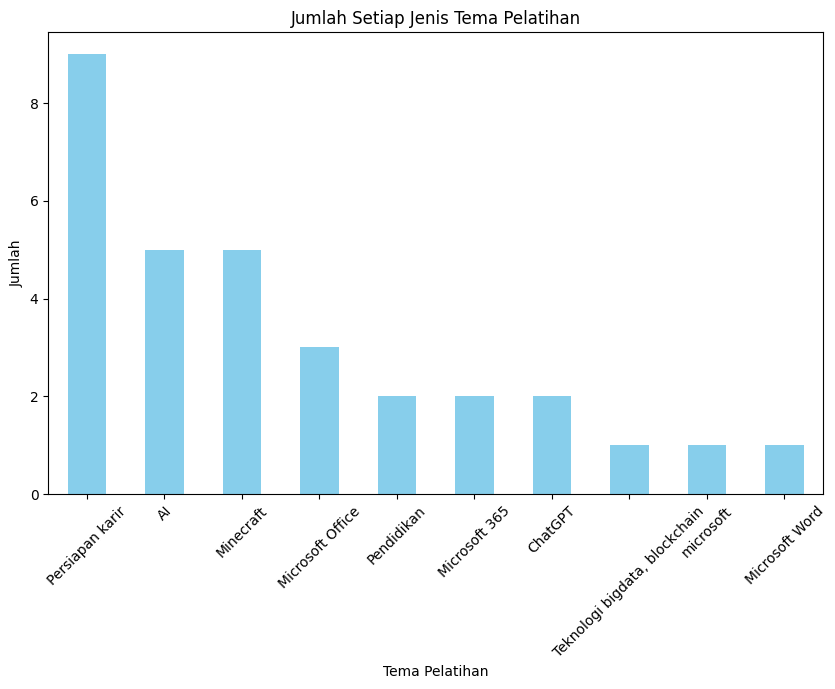

In [27]:
plt.figure(figsize=(10, 6))
df['Tema pelatihan'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Jumlah Setiap Jenis Tema Pelatihan')
plt.xlabel('Tema Pelatihan')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

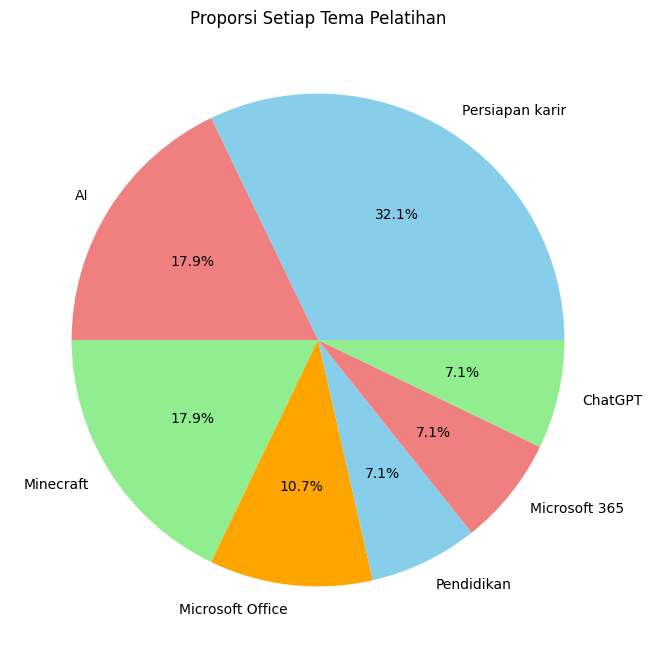

In [28]:
jumlah_tema = df['Tema pelatihan'].value_counts()
jumlah_tema[jumlah_tema/sum(jumlah_tema)< 0.03] = None

plt.figure(figsize=(8, 8))
plt.pie(jumlah_tema.dropna(), labels=jumlah_tema.dropna().index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen', 'orange'])
plt.title('Proporsi Setiap Tema Pelatihan')
plt.show()

Analisis judul yang paling banyak mendaftar dan menghadiri event.

In [29]:
ringkasan_judul = df.groupby('Judul')[['Pendaftar', 'Jumlah yang hadir']].sum().reset_index()

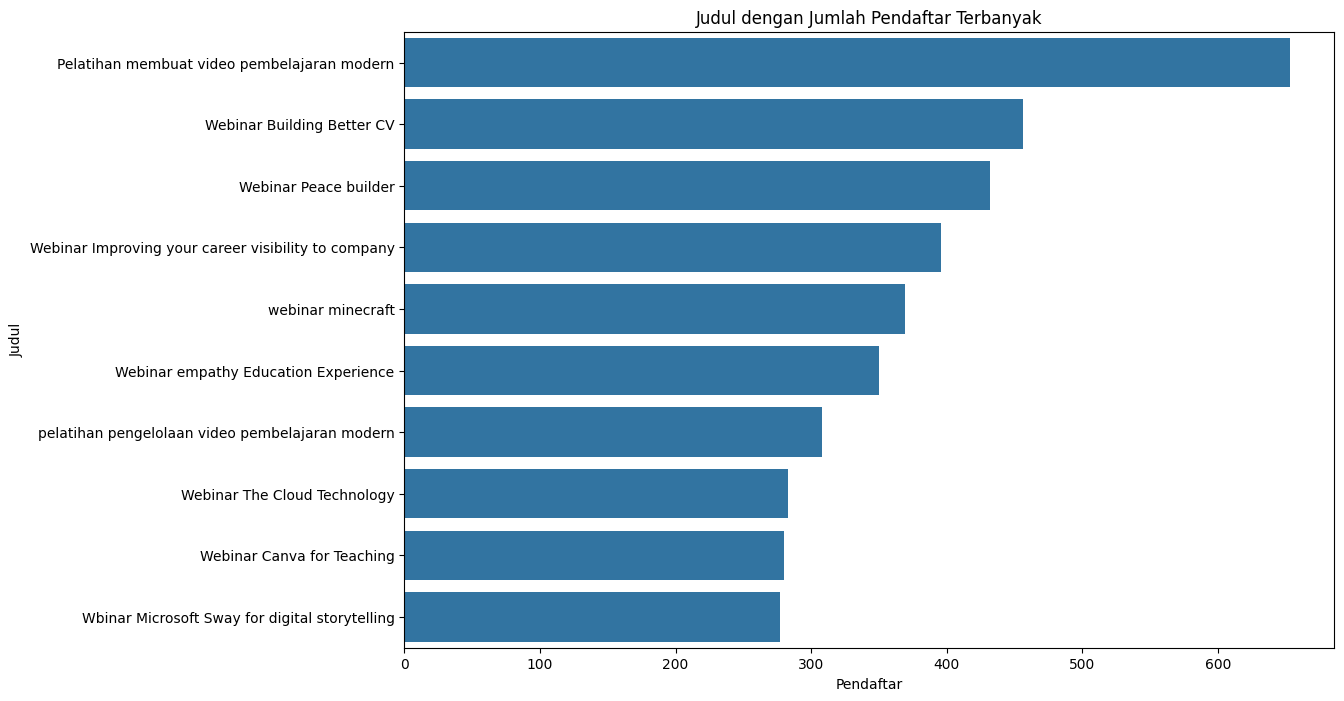

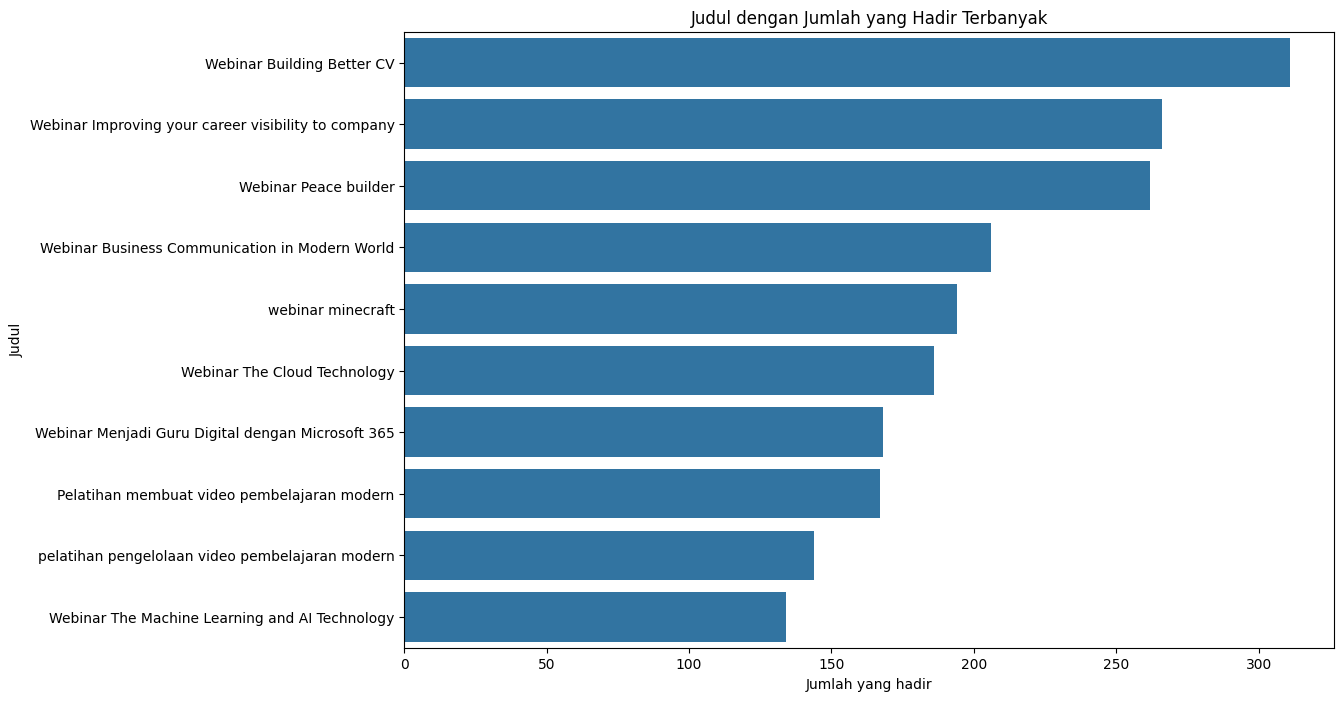

In [36]:
sorted_pendaftar = ringkasan_judul.sort_values(by='Pendaftar', ascending=False)
sorted_hadir = ringkasan_judul.sort_values(by='Jumlah yang hadir', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Pendaftar', y='Judul', data=sorted_pendaftar.head(10))
plt.title('Judul dengan Jumlah Pendaftar Terbanyak')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Jumlah yang hadir', y='Judul', data=sorted_hadir.head(10))
plt.title('Judul dengan Jumlah yang Hadir Terbanyak')
plt.show()


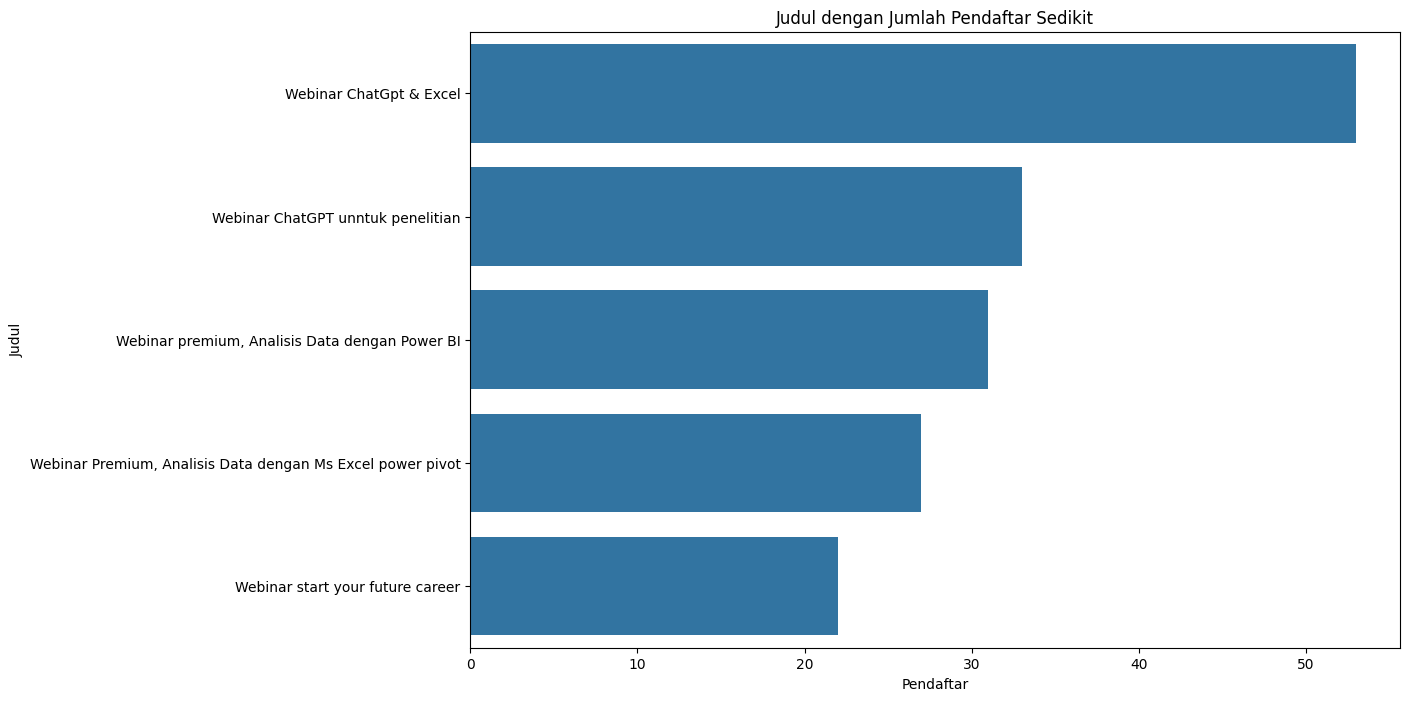

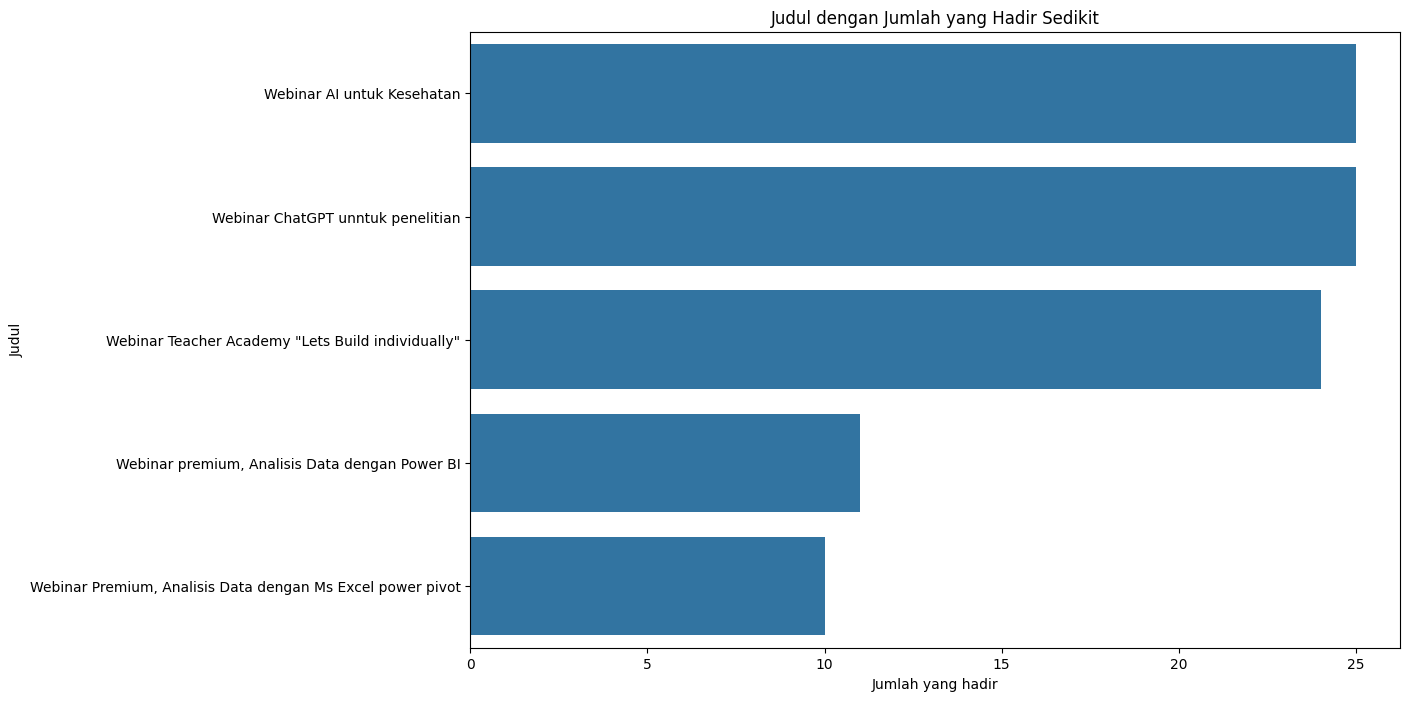

In [32]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Pendaftar', y='Judul', data=sorted_pendaftar.tail(5))
plt.title('Judul dengan Jumlah Pendaftar Sedikit')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Jumlah yang hadir', y='Judul', data=sorted_hadir.tail(5))
plt.title('Judul dengan Jumlah yang Hadir Sedikit')
plt.show()

In [45]:
print(sorted_pendaftar.head(1))
print(sorted_pendaftar.tail(1))
print(sorted_hadir.head(1))
print(sorted_hadir.tail(1))

                                         Judul  Pendaftar  Jumlah yang hadir
1  Pelatihan membuat video pembelajaran modern        653                167
                               Judul  Pendaftar  Jumlah yang hadir
29  Webinar start your future career         22                 53
                        Judul  Pendaftar  Jumlah yang hadir
7  Webinar Building Better CV        456                311
                                                Judul  Pendaftar  \
19  Webinar Premium, Analisis Data dengan Ms Excel...         27   

    Jumlah yang hadir  
19                 10  


Menganalisis bulan dan jam tertentu yang paling diminati dari pendaftar dan kehadiran peserta.

In [46]:
ringkasan_bulan = df.groupby('Bulan Penyelenggaraan')[['Pendaftar', 'Jumlah yang hadir']].sum().reset_index()

In [48]:
print(ringkasan_bulan)

   Bulan Penyelenggaraan  Pendaftar  Jumlah yang hadir
0                      2       1434                570
1                      3       2858               1678
2                      5        394                152
3                      6       1226                582
4                      7         33                 25
5                      8         95                 38
6                      9        210                125
7                     10       1151                588
8                     11         96                 24
9                     12         85                 47


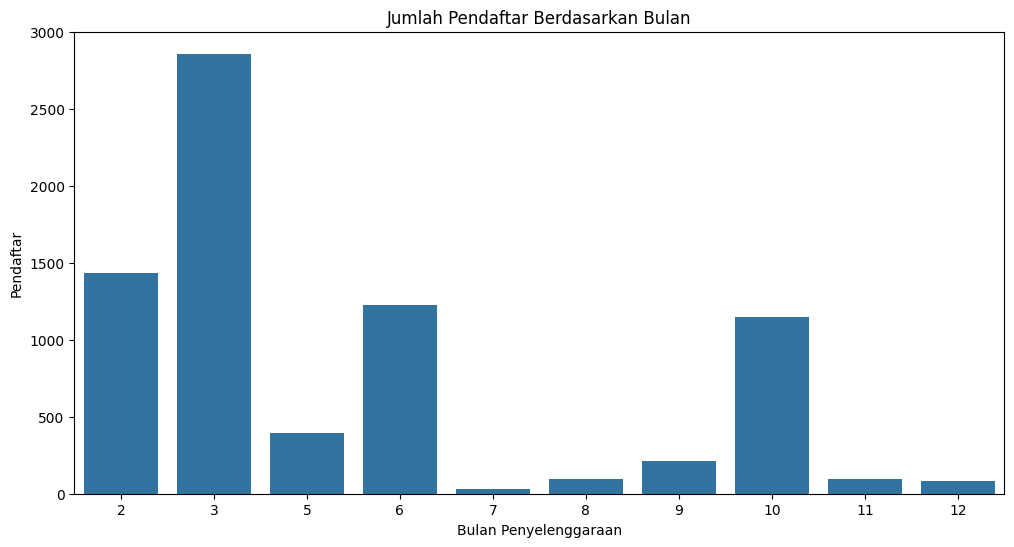

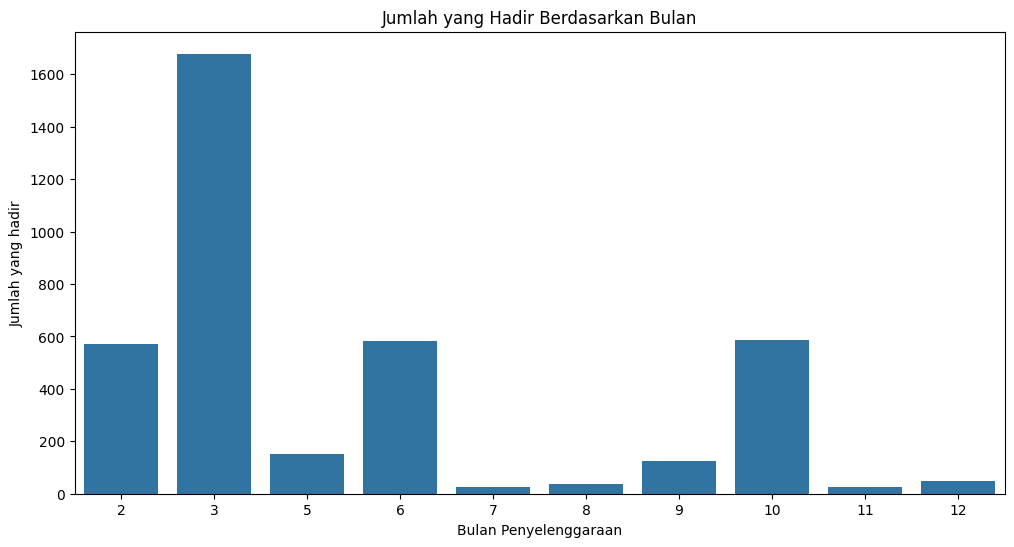

In [47]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Bulan Penyelenggaraan', y='Pendaftar', data=ringkasan_bulan)
plt.title('Jumlah Pendaftar Berdasarkan Bulan')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Bulan Penyelenggaraan', y='Jumlah yang hadir', data=ringkasan_bulan)
plt.title('Jumlah yang Hadir Berdasarkan Bulan')
plt.show()

In [50]:
# Mengelompokkan dan menghitung total pendaftar per jam
grup_jam = df.groupby('Jam')[['Pendaftar', 'Jumlah yang hadir']].sum().reset_index()


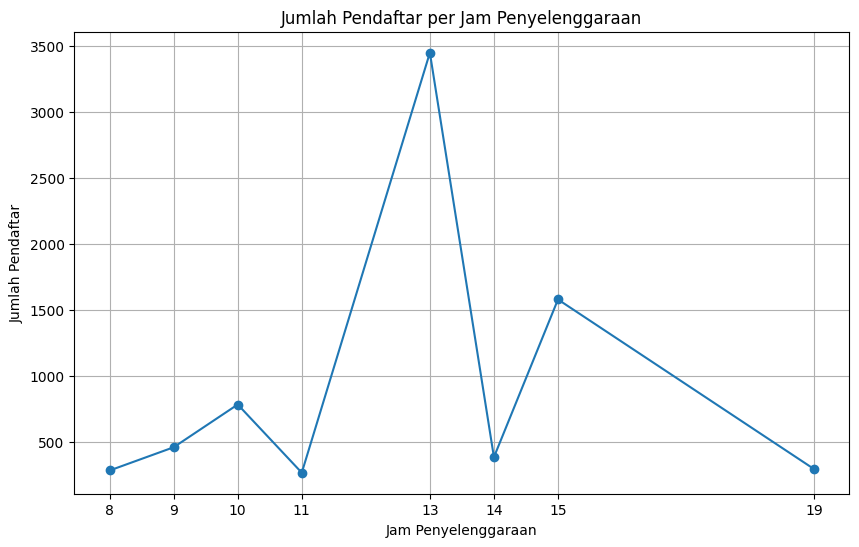

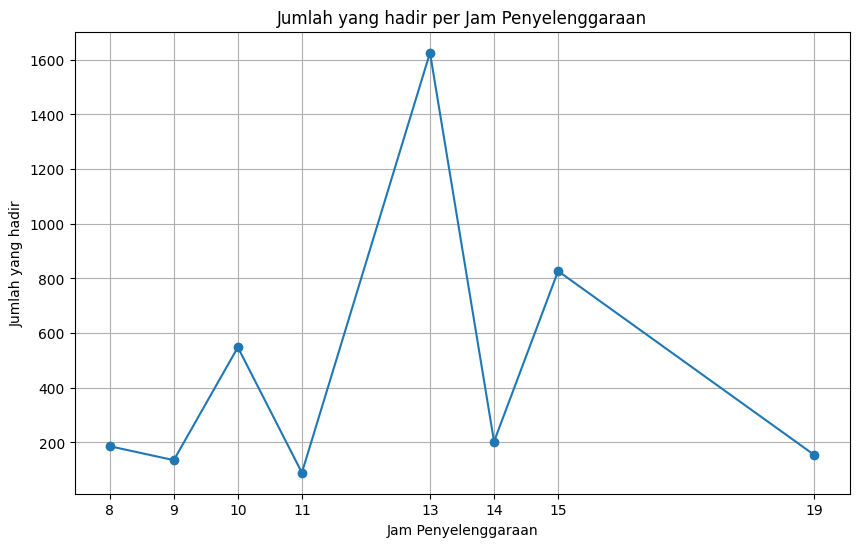

In [49]:

# Membuat visualisasi
plt.figure(figsize=(10, 6))
plt.plot(grup_jam['Jam'], grup_jam['Pendaftar'], marker='o')
plt.xlabel('Jam Penyelenggaraan')
plt.ylabel('Jumlah Pendaftar')
plt.title('Jumlah Pendaftar per Jam Penyelenggaraan')
plt.xticks(grup_jam['Jam'])
plt.grid(True)
plt.show()

# Membuat visualisasi
plt.figure(figsize=(10, 6))
plt.plot(grup_jam['Jam'], grup_jam['Jumlah yang hadir'], marker='o')
plt.xlabel('Jam Penyelenggaraan')
plt.ylabel('Jumlah yang hadir')
plt.title('Jumlah yang hadir per Jam Penyelenggaraan')
plt.xticks(grup_jam['Jam'])
plt.grid(True)
plt.show()

Menganalisis kegiatan, target, media, dan tema pelatihan yang menarik jumlah pendaftar dan hadir terbanyak dapat membantu dalam fokus pemasaran dan penyelenggaraan kegiatan yang lebih efektif.

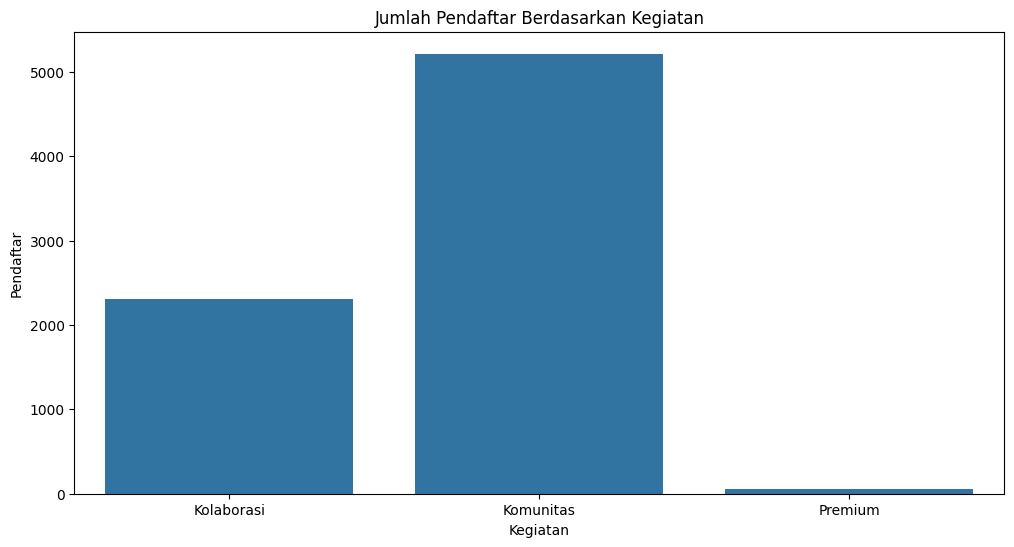

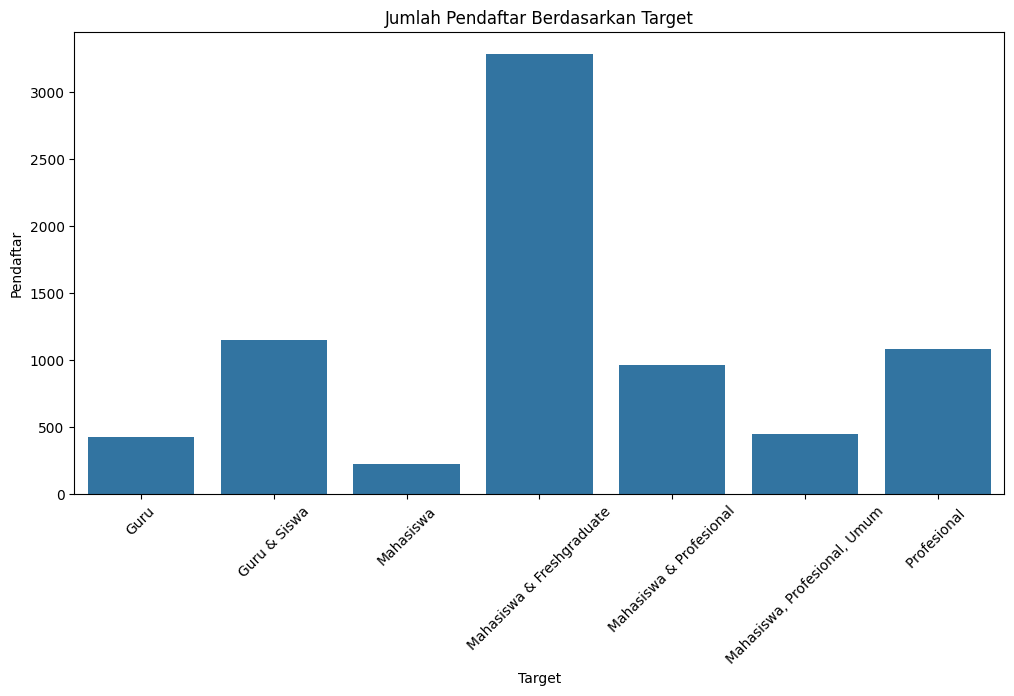

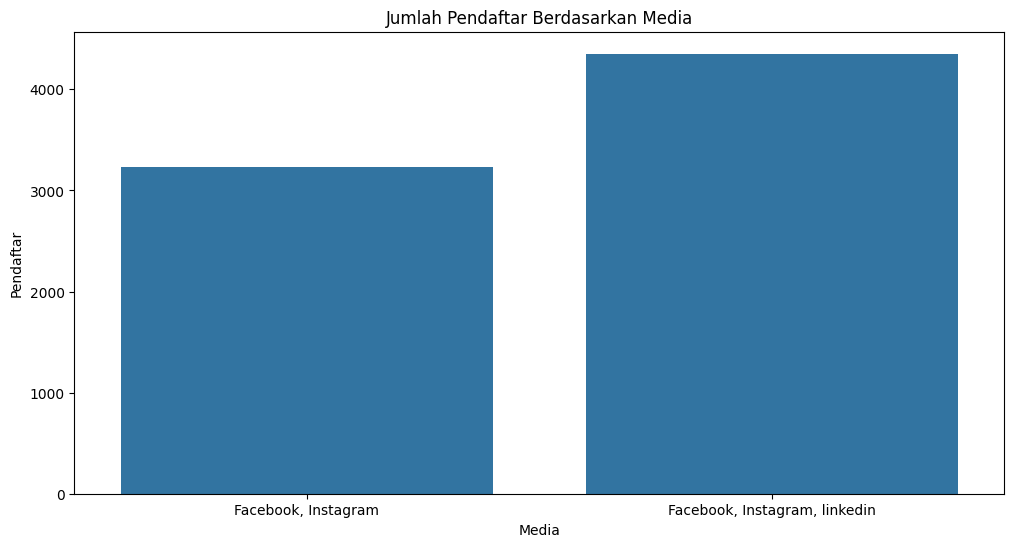

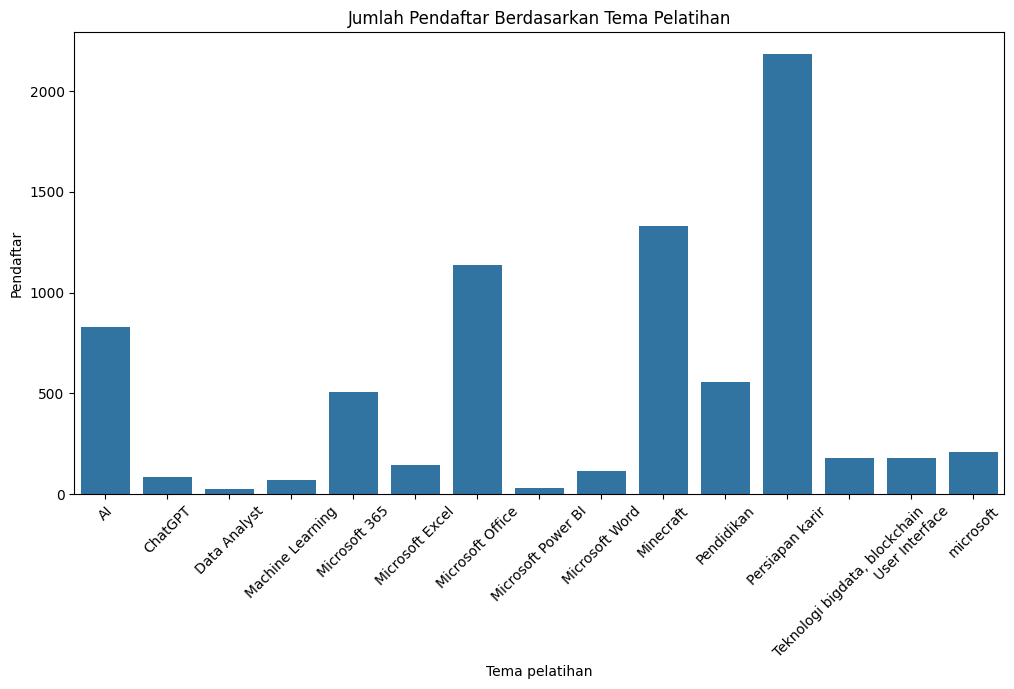

In [52]:
ringkasan_kegiatan = df.groupby('Kegiatan')[['Pendaftar', 'Jumlah yang hadir']].sum().reset_index()
ringkasan_target = df.groupby('Target')[['Pendaftar', 'Jumlah yang hadir']].sum().reset_index()
ringkasan_media = df.groupby('Media')[['Pendaftar', 'Jumlah yang hadir']].sum().reset_index()
ringkasan_tema = df.groupby('Tema pelatihan')[['Pendaftar', 'Jumlah yang hadir']].sum().reset_index()

# Visualisasi jumlah pendaftar dan yang hadir berdasarkan kegiatan
plt.figure(figsize=(12, 6))
sns.barplot(x='Kegiatan', y='Pendaftar', data=ringkasan_kegiatan)
plt.title('Jumlah Pendaftar Berdasarkan Kegiatan')
plt.show()

# Visualisasi jumlah pendaftar dan yang hadir berdasarkan target
plt.figure(figsize=(12, 6))
sns.barplot(x='Target', y='Pendaftar', data=ringkasan_target)
plt.title('Jumlah Pendaftar Berdasarkan Target')
plt.xticks(rotation=45)
plt.show()


# Visualisasi jumlah pendaftar dan yang hadir berdasarkan media
plt.figure(figsize=(12, 6))
sns.barplot(x='Media', y='Pendaftar', data=ringkasan_media)
plt.title('Jumlah Pendaftar Berdasarkan Media')
plt.show()

# Visualisasi jumlah pendaftar dan yang hadir berdasarkan tema pelatihan
plt.figure(figsize=(12, 6))
sns.barplot(x='Tema pelatihan', y='Pendaftar', data=ringkasan_tema)
plt.title('Jumlah Pendaftar Berdasarkan Tema Pelatihan')
plt.xticks(rotation=45)
plt.show()

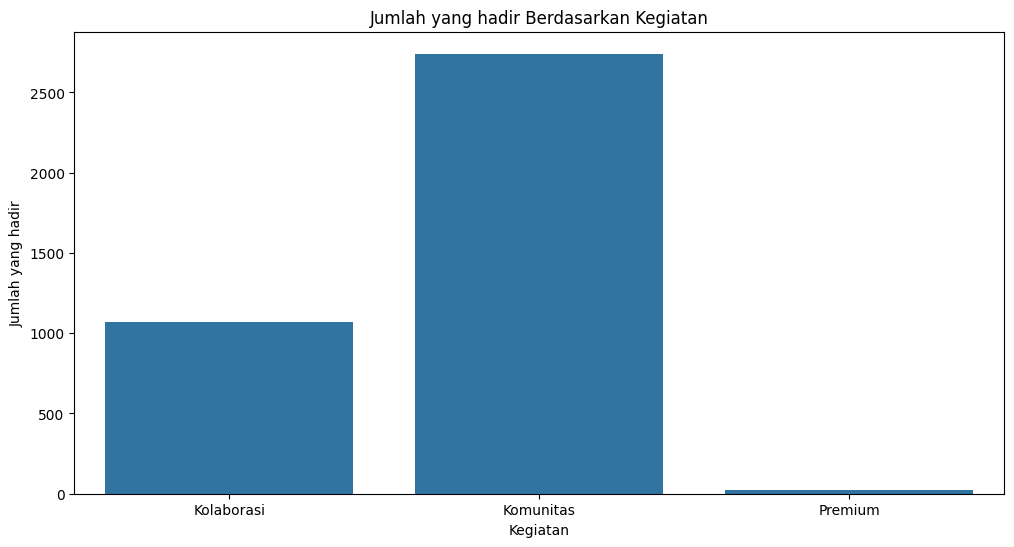

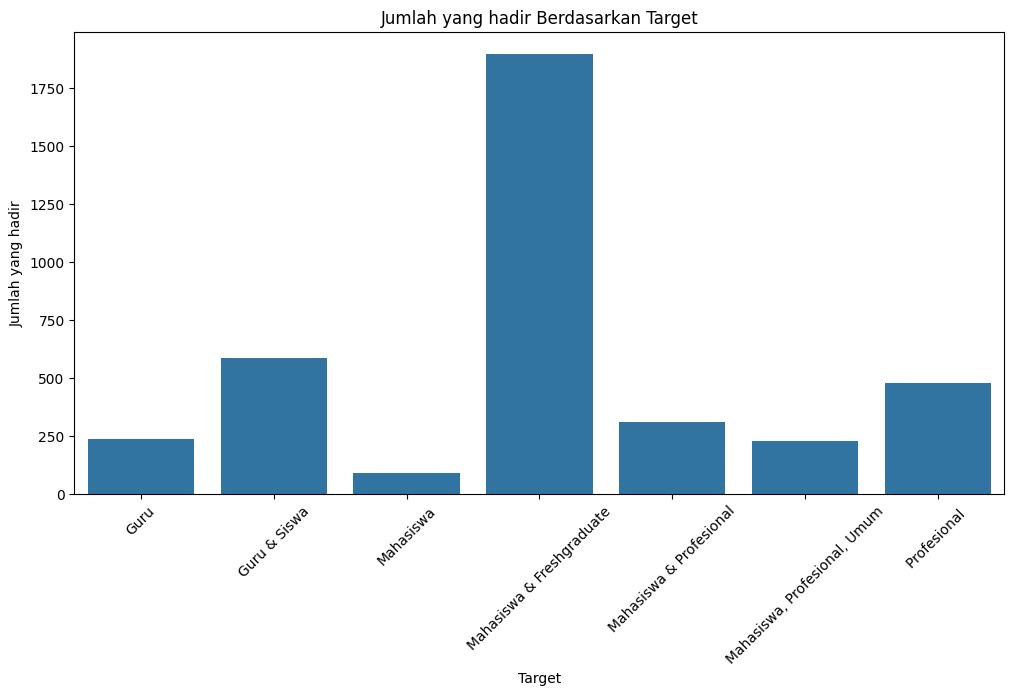

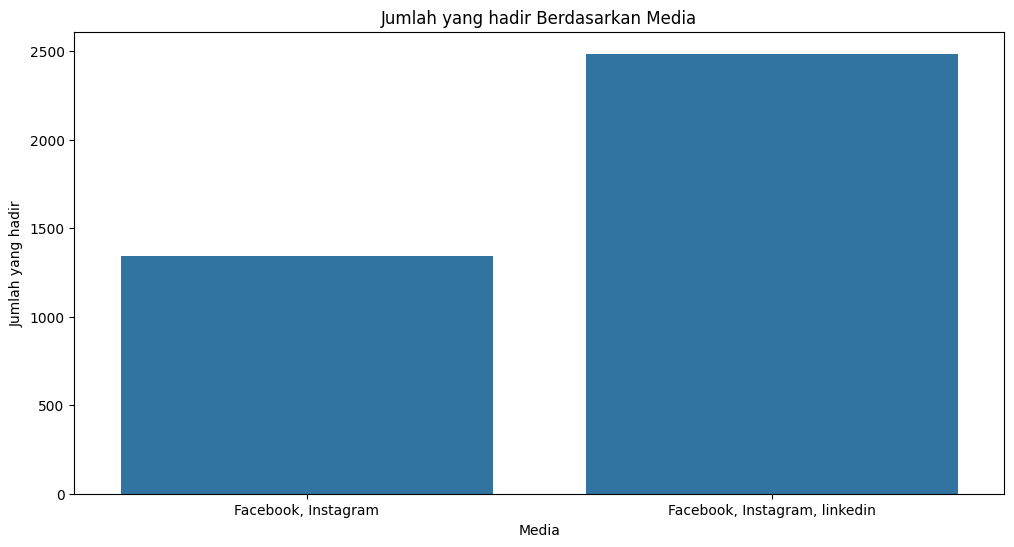

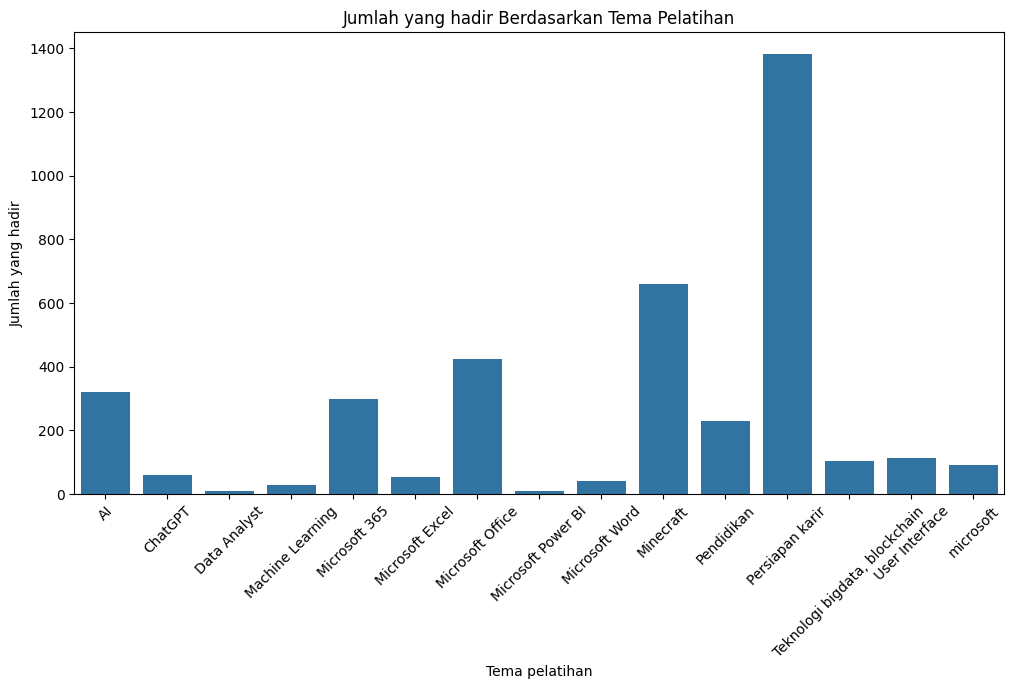

In [53]:
# Visualisasi jumlah pendaftar dan yang hadir berdasarkan kegiatan
plt.figure(figsize=(12, 6))
sns.barplot(x='Kegiatan', y='Jumlah yang hadir', data=ringkasan_kegiatan)
plt.title('Jumlah yang hadir Berdasarkan Kegiatan')
plt.show()

# Visualisasi jumlah Jumlah yang hadir dan yang hadir berdasarkan target
plt.figure(figsize=(12, 6))
sns.barplot(x='Target', y='Jumlah yang hadir', data=ringkasan_target)
plt.title('Jumlah yang hadir Berdasarkan Target')
plt.xticks(rotation=45)
plt.show()


# Visualisasi jumlah Jumlah yang hadir dan yang hadir berdasarkan media
plt.figure(figsize=(12, 6))
sns.barplot(x='Media', y='Jumlah yang hadir', data=ringkasan_media)
plt.title('Jumlah yang hadir Berdasarkan Media')
plt.show()

# Visualisasi jumlah Jumlah yang hadir dan yang hadir berdasarkan tema pelatihan
plt.figure(figsize=(12, 6))
sns.barplot(x='Tema pelatihan', y='Jumlah yang hadir', data=ringkasan_tema)
plt.title('Jumlah yang hadir Berdasarkan Tema Pelatihan')
plt.xticks(rotation=45)
plt.show()

In [56]:
print("Ringkasan Pendaftar dan Jumlah yang Hadir dari Kegiatan")
print(ringkasan_kegiatan)
print("Ringkasan Pendaftar dan Jumlah yang Hadir dari Target")
print(ringkasan_target)
print("Ringkasan Pendaftar dan Jumlah yang Hadir dari Media")
print(ringkasan_media)
print("Ringkasan Pendaftar dan Jumlah yang Hadir dari Tema")
print(ringkasan_tema)

Ringkasan Pendaftar dan Jumlah yang Hadir dari Kegiatan
     Kegiatan  Pendaftar  Jumlah yang hadir
0  Kolaborasi       2311               1067
1   Komunitas       5213               2741
2     Premium         58                 21
Ringkasan Pendaftar dan Jumlah yang Hadir dari Target
                         Target  Pendaftar  Jumlah yang hadir
0                          Guru        428                239
1                  Guru & Siswa       1151                588
2                     Mahasiswa        226                 91
3     Mahasiswa & Freshgraduate       3284               1895
4       Mahasiswa & Profesional        961                311
5  Mahasiswa, Profesional, Umum        452                228
6                  Profesional        1080                477
Ringkasan Pendaftar dan Jumlah yang Hadir dari Media
                           Media  Pendaftar  Jumlah yang hadir
0            Facebook, Instagram       3230               1344
1  Facebook, Instagram, linkedin       

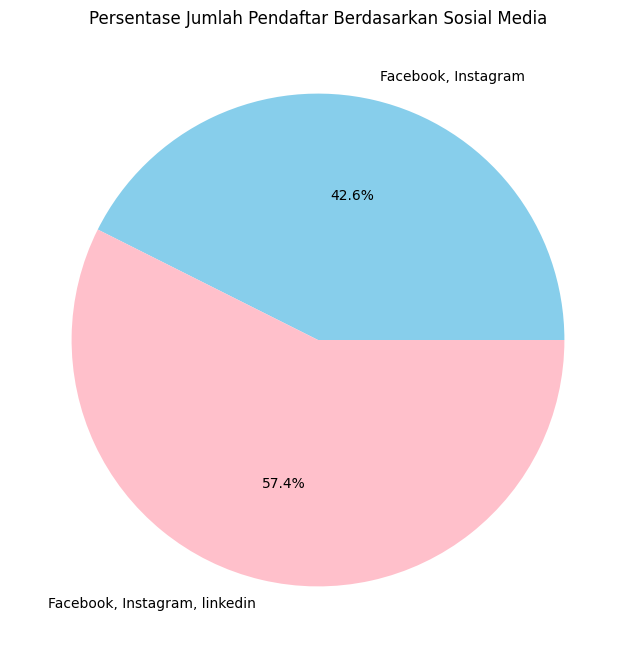

In [57]:
plt.figure(figsize=(8, 8))
plt.pie(ringkasan_media['Pendaftar'], labels=ringkasan_media['Media'], autopct='%1.1f%%', colors=['skyblue', 'pink'])
plt.title('Persentase Jumlah Pendaftar Berdasarkan Sosial Media')
plt.show()

Menghitung rata-rata reach, impression, dan engagement berdasarkan media sosial dapat membantu mengevaluasi efektivitas kampanye di platform-platform tersebut.

In [58]:
ringkasan_media_sosial = df.groupby('Media')[['Reach', 'impression', 'engagement']].mean().reset_index()
print('Rata-rata Reach, Impression dan Engagement')
print(ringkasan_media_sosial)

Rata-rata Reach, Impression dan Engagement
                           Media        Reach   impression  engagement
0            Facebook, Instagram  1758.500000  2113.583333  115.333333
1  Facebook, Instagram, linkedin  2206.458333  2744.083333   65.250000


In [59]:
# Membuat pivot table untuk melihat rata-rata reach, impression, dan engagement
pivot_table = pd.pivot_table(df, index=['Media', 'Target'], values=['Reach', 'impression', 'engagement'], aggfunc='sum')
print("Rata-rata Reach, Impression, dan Engagement berdasarkan Media dan Target:")
print(pivot_table)

Rata-rata Reach, Impression, dan Engagement berdasarkan Media dan Target:
                                                            Reach  engagement  \
Media                         Target                                            
Facebook, Instagram           Guru                           2501          48   
                              Guru & Siswa                   4235         141   
                              Mahasiswa                      2470         292   
                              Mahasiswa & Freshgraduate      1468          91   
                              Mahasiswa & Profesional        5763         591   
                              Profesional                    4665         221   
Facebook, Instagram, linkedin Guru                           1634         100   
                              Mahasiswa & Freshgraduate     20726         740   
                              Mahasiswa, Profesional, Umum  26349         515   
                              Profe

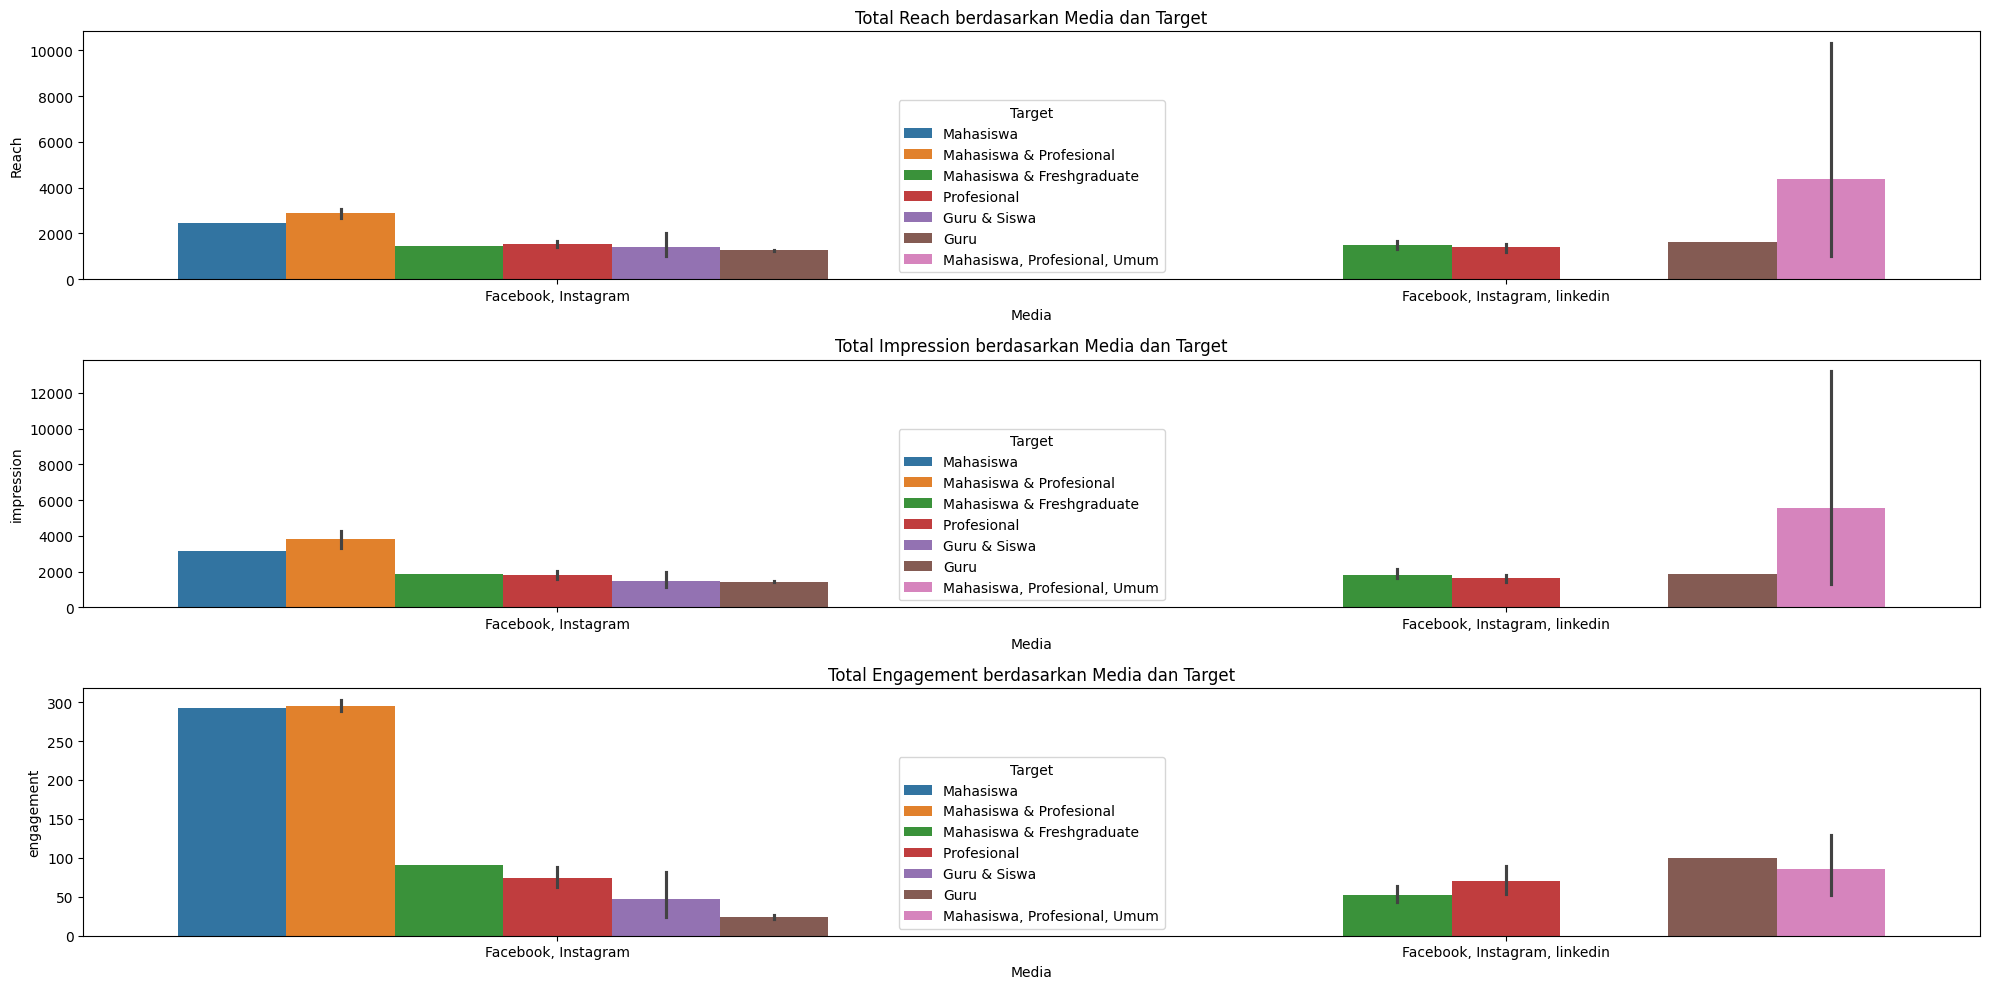

In [61]:
# Membuat visualisasi
plt.figure(figsize=(20, 10))

# Visualisasi rata-rata reach berdasarkan kombinasi Media dan Target
plt.subplot(3, 1, 1)
sns.barplot(x='Media', y='Reach', hue='Target', data=df)
plt.title('Total Reach berdasarkan Media dan Target')

# Visualisasi Total impression berdasarkan kombinasi Media dan Target
plt.subplot(3, 1, 2)
sns.barplot(x='Media', y='impression', hue='Target', data=df)
plt.title('Total Impression berdasarkan Media dan Target')

# Visualisasi Total engagement berdasarkan kombinasi Media dan Target
plt.subplot(3, 1, 3)
sns.barplot(x='Media', y='engagement', hue='Target', data=df)
plt.title('Total Engagement berdasarkan Media dan Target')

plt.tight_layout()
plt.show()

Melihat apakah biaya iklan mempengaruhi performa pendaftar dapat membantu dalam menentukan anggaran iklan yang optimal.

In [62]:
korelasi_biaya_iklan = df['Biaya iklan'].corr(df['Pendaftar'])
print(korelasi_biaya_iklan)

-0.1784132822656842


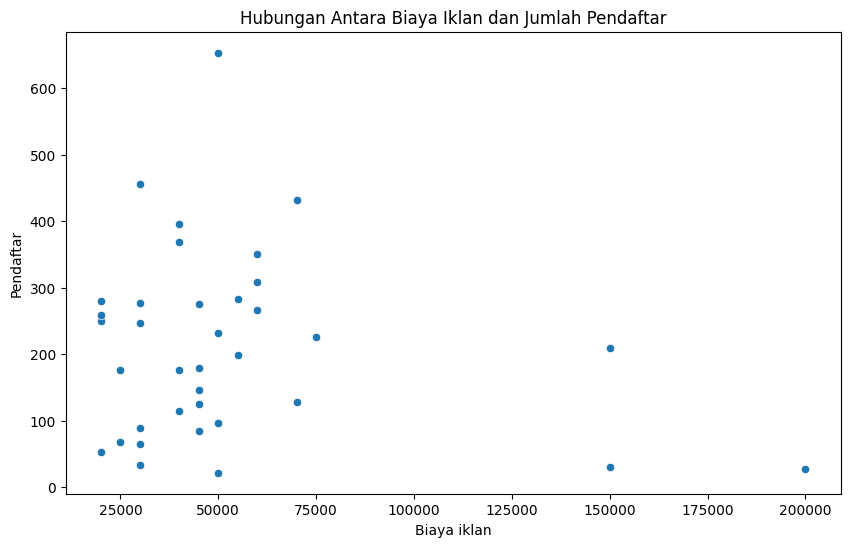

In [63]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Biaya iklan', y='Pendaftar', data=df)
plt.title('Hubungan Antara Biaya Iklan dan Jumlah Pendaftar')
plt.show()

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Pisahkan data menjadi fitur (X) dan target (y)
X = df[['Biaya iklan']]
y = df['Pendaftar']

# Pisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model regresi linear
model = LinearRegression()

# Latih model
model.fit(X_train, y_train)

# Cetak koefisien dan intercept
print(f'Koefisien: {model.coef_[0]}')
print(f'Intercept: {model.intercept_}')

Koefisien: -0.0010917838081635721
Intercept: 280.9262948207171


Menganalisis profit dari berbagai aspek seperti judul, kegiatan, tema pelatihan, target, dan media sosial dapat memberikan pandangan yang lebih komprehensif tentang keberhasilan kampanye.

In [65]:
total_profit_by_judul = df.groupby('Judul')['Profit'].sum().reset_index()
total_profit_by_kegiatan = df.groupby('Kegiatan')['Profit'].sum().reset_index()
total_profit_by_tema = df.groupby('Tema pelatihan')['Profit'].sum().reset_index()
total_profit_by_target = df.groupby('Target')['Profit'].sum().reset_index()
total_profit_by_media = df.groupby('Media')['Profit'].sum().reset_index()

In [66]:
judul_terbanyak_profit = total_profit_by_judul.loc[total_profit_by_judul['Profit'].idxmax()]
kegiatan_terbanyak_profit = total_profit_by_kegiatan.loc[total_profit_by_kegiatan['Profit'].idxmax()]
tema_terbanyak_profit = total_profit_by_tema.loc[total_profit_by_tema['Profit'].idxmax()]
target_terbanyak_profit = total_profit_by_target.loc[total_profit_by_target['Profit'].idxmax()]
media_terbanyak_profit = total_profit_by_media.loc[total_profit_by_media['Profit'].idxmax()]

In [73]:
print('Berikut Judul, Kegiatan, Tema, Target dan Media dengan Profit terbesar')
print(judul_terbanyak_profit)
print(tema_terbanyak_profit)
print(kegiatan_terbanyak_profit)
print(target_terbanyak_profit)
print(media_terbanyak_profit)

Berikut Judul, Kegiatan, Tema, Target dan Media dengan Profit terbesar
Judul     Webinar Premium, Analisis Data dengan Ms Excel...
Profit                                               540000
Name: 19, dtype: object
Tema pelatihan    Data Analyst
Profit                  540000
Name: 2, dtype: object
Kegiatan    Premium
Profit       875000
Name: 2, dtype: object
Target    Mahasiswa, Profesional, Umum
Profit                         1060000
Name: 5, dtype: object
Media     Facebook, Instagram, linkedin
Profit                          1770000
Name: 1, dtype: object


In [74]:
print('Berikut Judul, Kegiatan, Tema, Target dan Media dengan Profit terkecil')
judul_profit_kecil = total_profit_by_judul.loc[total_profit_by_judul['Profit'].idxmin()]
print(judul_profit_kecil)
kegiatan_profit_kecil = total_profit_by_kegiatan.loc[total_profit_by_kegiatan['Profit'].idxmin()]
print(kegiatan_profit_kecil)
tema_profit_kecil = total_profit_by_tema.loc[total_profit_by_tema['Profit'].idxmin()]
print(tema_profit_kecil)
target_profit_kecil = total_profit_by_target.loc[total_profit_by_target['Profit'].idxmin()]
print(target_profit_kecil)
media_profit_kecil = total_profit_by_media.loc[total_profit_by_media['Profit'].idxmin()]
print(media_profit_kecil)

Berikut Judul, Kegiatan, Tema, Target dan Media dengan Profit terkecil
Judul     Webinar ChatGPT unntuk penelitian
Profit                                    0
Name: 10, dtype: object
Kegiatan    Kolaborasi
Profit          585000
Name: 0, dtype: object
Tema pelatihan    ChatGPT
Profit                  0
Name: 1, dtype: object
Target    Mahasiswa
Profit        45000
Name: 2, dtype: object
Media     Facebook, Instagram
Profit                 520000
Name: 0, dtype: object


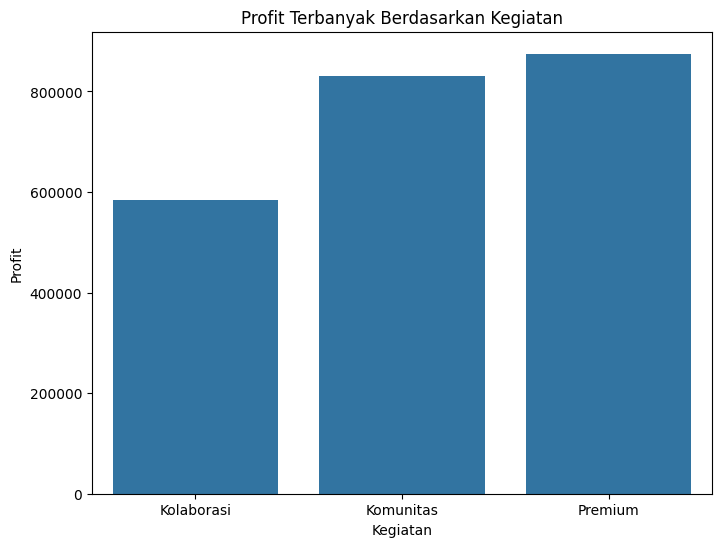

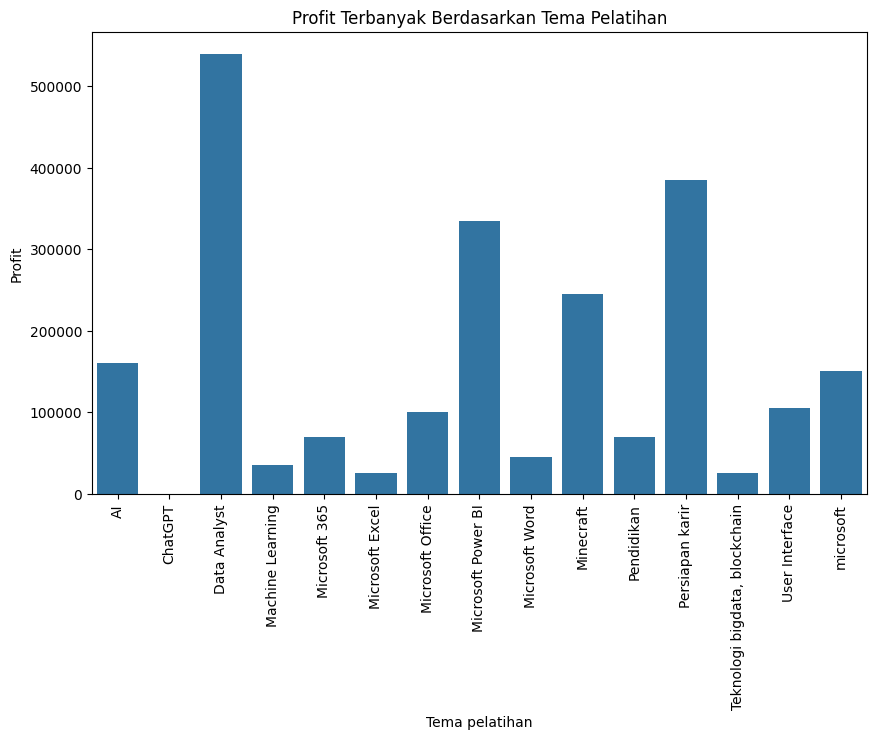

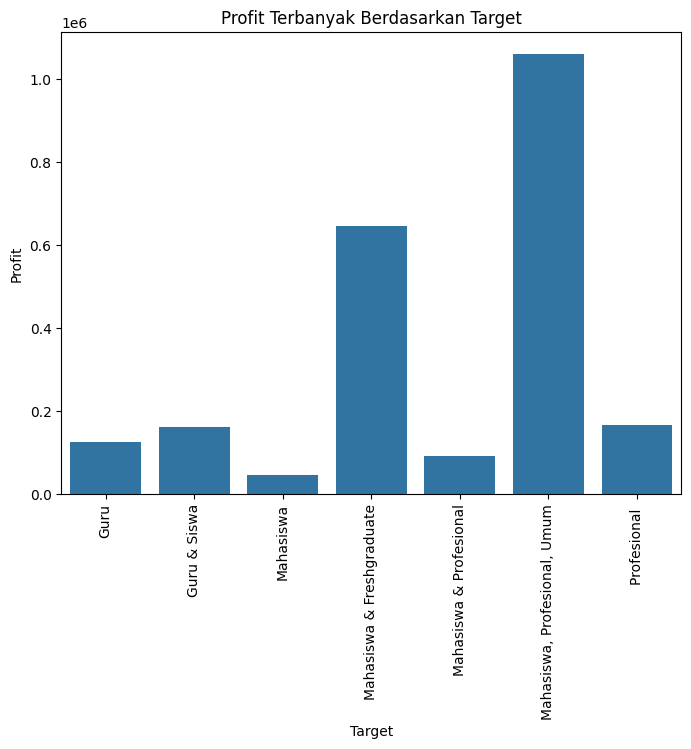

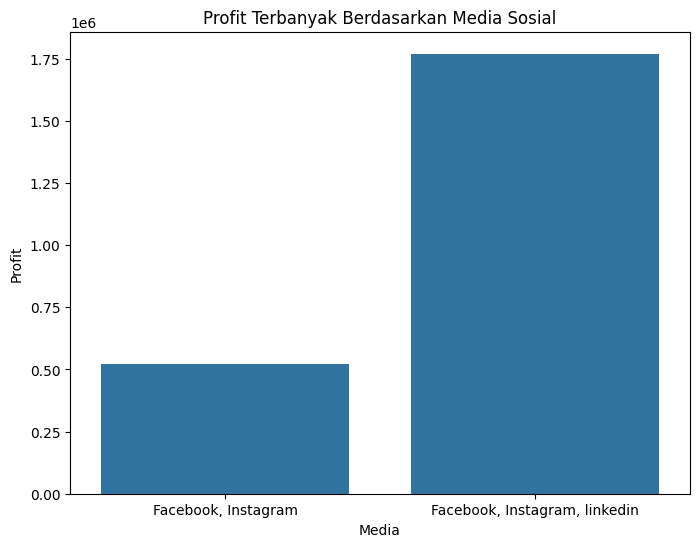

In [70]:
# Visualisasi profit terbanyak berdasarkan kegiatan
plt.figure(figsize=(8, 6))
sns.barplot(x='Kegiatan', y='Profit', data=total_profit_by_kegiatan)
plt.title('Profit Terbanyak Berdasarkan Kegiatan')
plt.show()

# Visualisasi profit terbanyak berdasarkan tema pelatihan
plt.figure(figsize=(10, 6))
sns.barplot(x='Tema pelatihan', y='Profit', data=total_profit_by_tema)
plt.title('Profit Terbanyak Berdasarkan Tema Pelatihan')
plt.xticks(rotation=90)
plt.show()

# Visualisasi profit terbanyak berdasarkan target
plt.figure(figsize=(8, 6))
sns.barplot(x='Target', y='Profit', data=total_profit_by_target)
plt.title('Profit Terbanyak Berdasarkan Target')
plt.xticks(rotation=90)
plt.show()

# Visualisasi profit terbanyak berdasarkan media sosial
plt.figure(figsize=(8, 6))
sns.barplot(x='Media', y='Profit', data=total_profit_by_media)
plt.title('Profit Terbanyak Berdasarkan Media Sosial')
plt.show()

Menganalisis apakah durasi iklan berpengaruh terhadap jumlah pendaftar dan menghitung rata-rata reach, engagement, dan impression dari durasi iklan dapat memberikan wawasan tambahan.

In [75]:
ringkasan_durasi = df.groupby('Durasi Iklan')[['Reach', 'impression', 'engagement']].mean().reset_index()

In [76]:
print('Rata-rata Reach, Impression dan Engagement berdasarkan durasi Iklan')
print(ringkasan_durasi)

Rata-rata Reach, Impression dan Engagement berdasarkan durasi Iklan
   Durasi Iklan        Reach   impression  engagement
0             1  1328.125000  1602.750000   56.125000
1             2  1620.666667  1961.583333   62.333333
2             3  1534.600000  1796.600000   98.800000
3             4  1516.000000  1736.000000   67.000000
4             5  2173.500000  2735.250000  126.500000
5             7  7466.000000  9625.333333  171.666667
6            10   872.000000  1042.000000   41.000000
7            11  1415.500000  1641.000000   65.000000


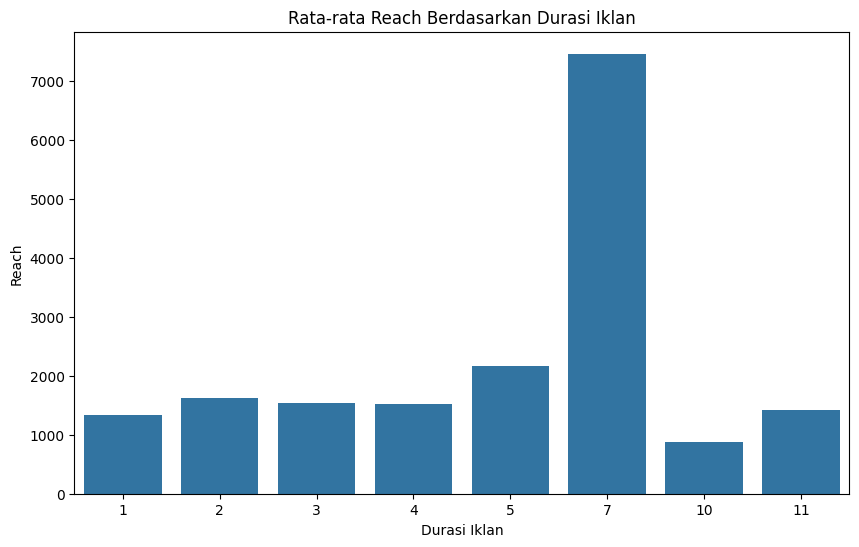

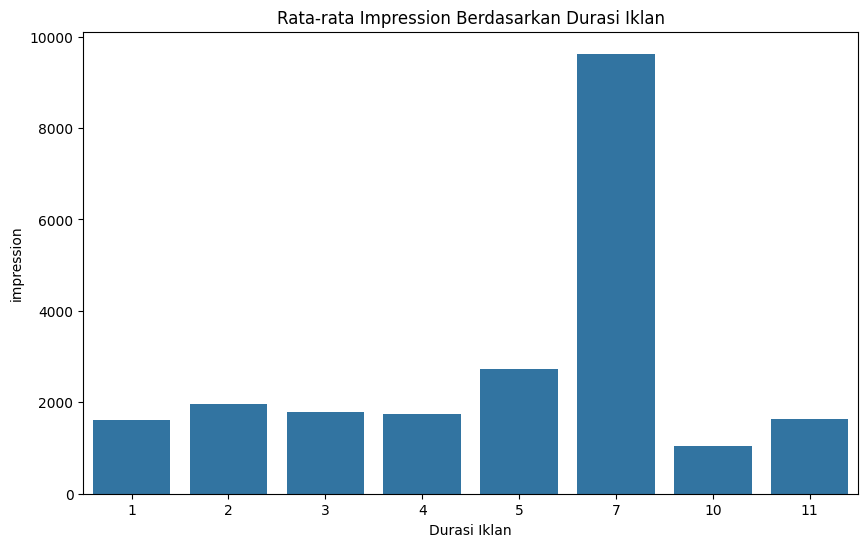

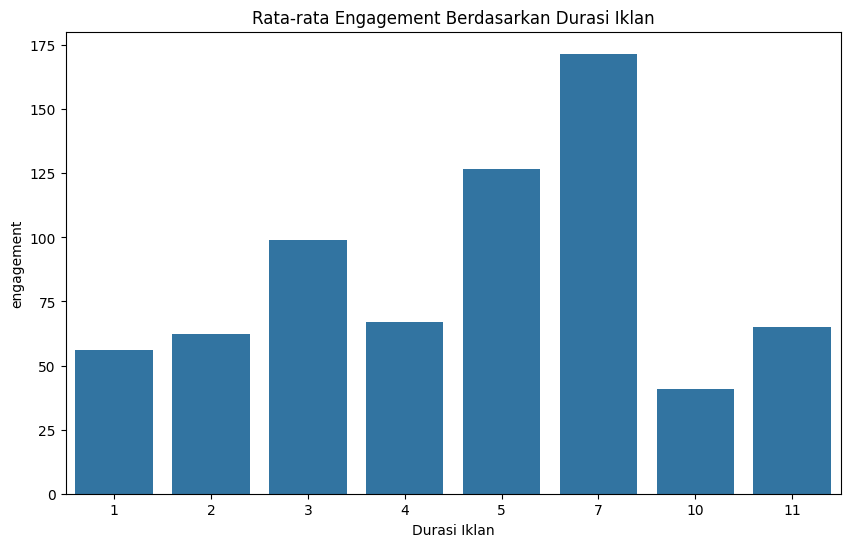

In [77]:
# Visualisasi rata-rata reach berdasarkan durasi iklan
plt.figure(figsize=(10, 6))
sns.barplot(x='Durasi Iklan', y='Reach', data=ringkasan_durasi)
plt.title('Rata-rata Reach Berdasarkan Durasi Iklan')
plt.show()

# Visualisasi rata-rata impression berdasarkan durasi iklan
plt.figure(figsize=(10, 6))
sns.barplot(x='Durasi Iklan', y='impression', data=ringkasan_durasi)
plt.title('Rata-rata Impression Berdasarkan Durasi Iklan')
plt.show()

# Visualisasi rata-rata engagement berdasarkan durasi iklan
plt.figure(figsize=(10, 6))
sns.barplot(x='Durasi Iklan', y='engagement', data=ringkasan_durasi)
plt.title('Rata-rata Engagement Berdasarkan Durasi Iklan')
plt.show()

In [78]:
kor_durasi_pendaftar = df['Durasi Iklan'].corr(df['Pendaftar'])
print(kor_durasi_pendaftar)

-0.2382141633438705


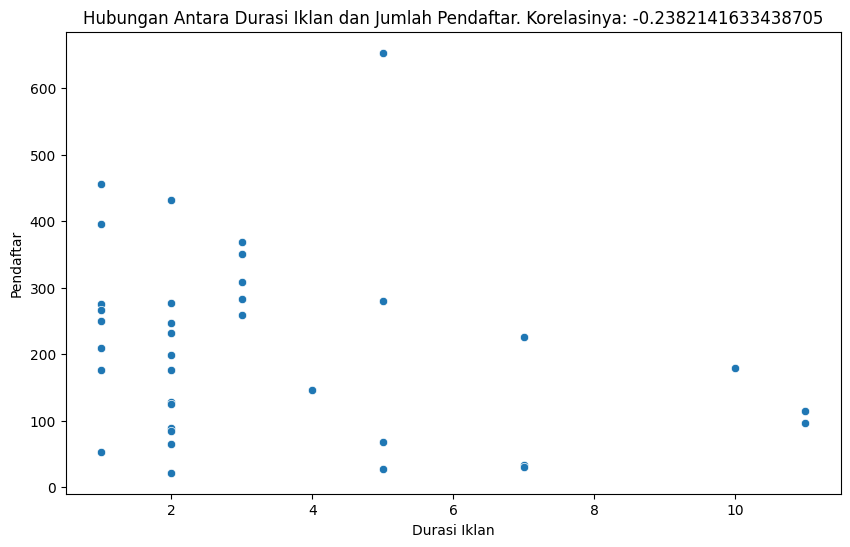

In [79]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Durasi Iklan', y='Pendaftar', data=df)
plt.title(f'Hubungan Antara Durasi Iklan dan Jumlah Pendaftar. Korelasinya: {kor_durasi_pendaftar}')
plt.show()